In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def DFT(f,N):
    f_k = np.zeros(N,dtype=complex)
    for k in np.arange(0,N):
        for n in np.arange(0,N):
            f_k[k] = f_k[k] + f[n]*np.exp(-2*np.pi*1j*k*n/N)
    return f_k
def IDFT(f_k,N):
    f = np.zeros(N,dtype=complex)
    for n in np.arange(0,N):
        for k in np.arange(0,N):
            f[n] = f[n] + f_k[k]*np.exp(2*np.pi*1j*k*n/N)
        f[n] = f[n]/N
    return f
def gauss(x,xc=0,sigma=0.5):
    return np.exp(-0.5*(x-xc)**2/sigma**2)

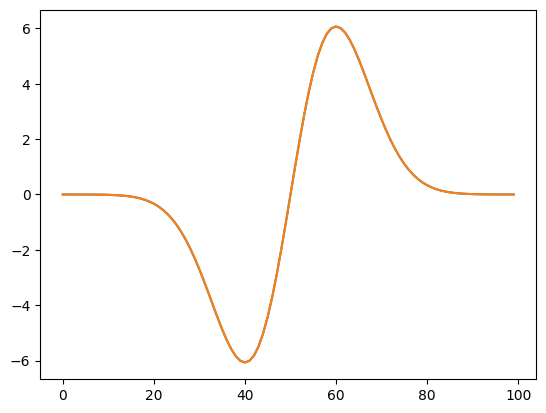

In [17]:
# Compare Inverse DFT
N = 100
L = 1
a = L/N
xlattice = (np.arange(0,N))*a
qlattice = np.fft.fftfreq(N)*2*np.pi/a
y = -1j*qlattice*DFT(gauss(xlattice,0.5,0.1),N)
plt.plot(np.real(np.fft.ifft(y)))
plt.plot(np.real(IDFT(y,N)))

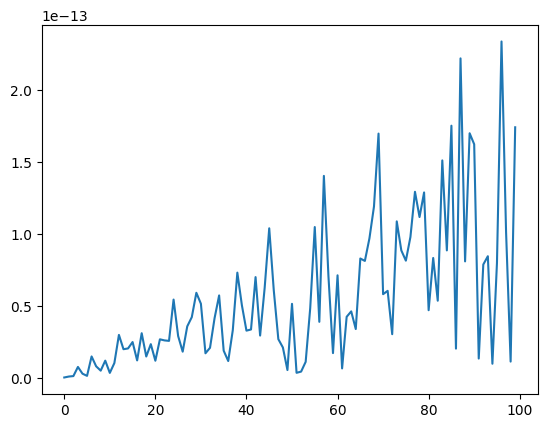

In [4]:
N = 100
L = 1
a = L/N
xlattice = (np.arange(0,N))*a
qlattice = np.fft.fftfreq(N)*2*np.pi/a

f = gauss(xlattice,0.5,0.1)
# FFT derivative
F = 1j*qlattice*DFT(f,N)
#F = F
f_fft = IDFT(F,N)
f_fft2 = np.fft.ifft(F)
#plt.plot(np.real(f_fft))
#plt.plot(np.real(f_fft2))
plt.plot(np.abs(f_fft-f_fft2))

In [19]:
np.fft.fftfreq(N)

array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06,  0.07,  0.08,
        0.09,  0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,
        0.18,  0.19,  0.2 ,  0.21,  0.22,  0.23,  0.24,  0.25,  0.26,
        0.27,  0.28,  0.29,  0.3 ,  0.31,  0.32,  0.33,  0.34,  0.35,
        0.36,  0.37,  0.38,  0.39,  0.4 ,  0.41,  0.42,  0.43,  0.44,
        0.45,  0.46,  0.47,  0.48,  0.49, -0.5 , -0.49, -0.48, -0.47,
       -0.46, -0.45, -0.44, -0.43, -0.42, -0.41, -0.4 , -0.39, -0.38,
       -0.37, -0.36, -0.35, -0.34, -0.33, -0.32, -0.31, -0.3 , -0.29,
       -0.28, -0.27, -0.26, -0.25, -0.24, -0.23, -0.22, -0.21, -0.2 ,
       -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11,
       -0.1 , -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02,
       -0.01])

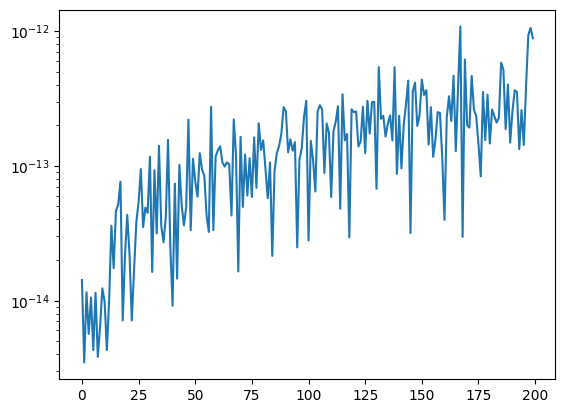

In [20]:
# Compare DFT
N = 200
x = np.random.rand(N)
plt.semilogy(np.abs(np.fft.fft(x)-DFT(x,N)))